In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches
from scipy.io import loadmat
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from matplotlib.text import Text

In [2]:
path = os.path.abspath('../../../1_Simulation_Results/numpy_files/')

colormap_data = loadmat('../cold2hot.mat')
cold2hot = ListedColormap(colormap_data['colormap'])
hot2cold = ListedColormap(colormap_data['colormap'][::-1])

# Gaussian

In [7]:
LIQ_GF     = np.load(path+'/Gaussian/Fitting/LIQ.npy')
LIQ_GT     = np.load(path+'/Gaussian/TDB/LIQ.npy')

vel_GF     = np.load(path+'/Gaussian/Fitting/vel.npy')
vel_GT     = np.load(path+'/Gaussian/TDB/vel.npy')

temp_GF    = np.load(path+'/Gaussian/Fitting/temp.npy')
temp_GT    = np.load(path+'/Gaussian/TDB/temp.npy')

timeS_GF  = np.load(path+'/Gaussian/Fitting/time.npy')
timeS_GT  = np.load(path+'/Gaussian/TDB/time.npy')

time_steps_GT, time_steps_GF =  timeS_GT.shape[0], timeS_GF.shape[0]

## Phase

In [ ]:
LIQ_GF     = np.load(path+'/Gaussian/Fitting/LIQ.npy')
LIQ_GT     = np.load(path+'/Gaussian/TDB/LIQ.npy')

timeS_GF  = np.load(path+'/Gaussian/Fitting/time.npy')
timeS_GT  = np.load(path+'/Gaussian/TDB/time.npy')

time_steps_GT, time_steps_GF =  timeS_GT.shape[0], timeS_GF.shape[0]

### Fitting

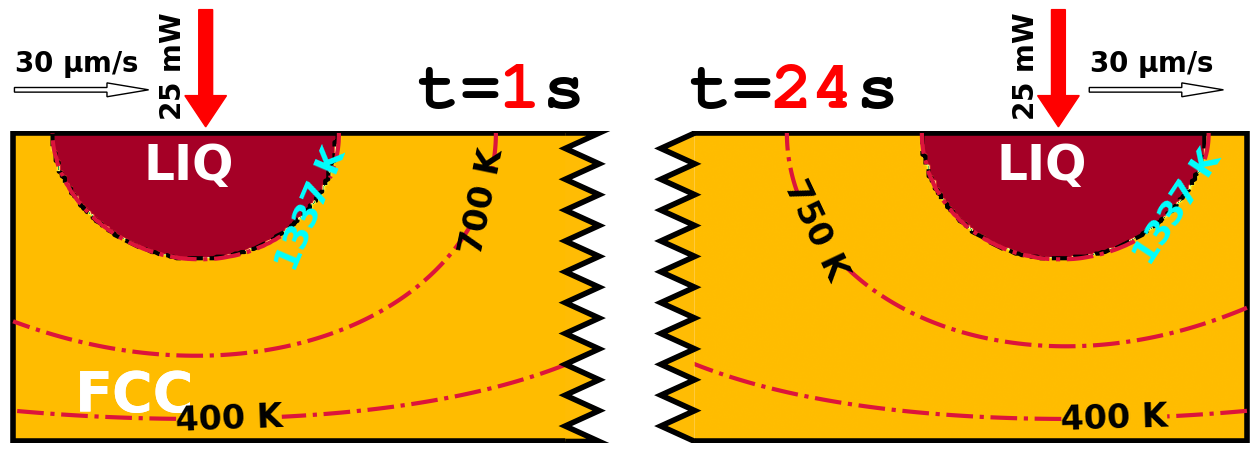

In [382]:
t_step = 82
scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"25 $\mathbf{mW}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_GF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

cmap = plt.get_cmap('RdYlGn_r')
cmap.set_under('white', alpha=0)
hmap1 = ax1.imshow(LIQ_GF[:,:180,t_step], cmap=cmap, vmin=0.5, vmax=1.0, aspect=0.5,  interpolation='quadric',)

cmap = plt.get_cmap('Wistia')
cmap.set_under('white', alpha=0) 
hmap2 = ax1.imshow(1-LIQ_GF[:,:180,t_step], cmap=cmap, vmin=0.5, vmax=1.5, aspect=0.5, interpolation='quadric',)

contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_GF[:, :, t_step], levels=contour_level_LIQ, colors='k', linestyles='--', linewidths=3,)

contour_levels = [400, 700,  1337]
label_colors = ['k', 'k', 'aqua']
contour = ax1.contour(temp_GF[:, :180, t_step], levels=contour_levels, colors='crimson', linewidths=3, linestyles='dashdot')
[(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=24, fmt='%1.0f K'), label_colors)]
  
ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
# ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
# ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
ax1.text(laser_pos-62, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
ax1.arrow(laser_pos-62, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
AuFCC_txt = ax1.text(20,180,'FCC', fontsize = 40, weight='bold', color='white')
AuLIQ_txt = ax1.text(laser_pos-20, 30,'LIQ', fontsize = 35, weight='bold', color='white')

# ax1.set_title(f't = {timeS_GF[t_step]:.0f}s', pad=10, loc='left', fontsize=30, weight='bold')
txt1 = Text(x=0.38, y=0.72, text='t= s', fontsize=50, color='k', rotation=0, weight='bold', fontname='FreeMono',)
txt2 = Text(x=0.43, y=0.72, text=f'{timeS_GF[t_step]:.0f}', fontsize=50, color='red', rotation=0, weight='bold', fontname='FreeMono',)
fig.add_artist(txt1)
fig.add_artist(txt2)

##################################
##################################
t_step = 465
laser_act_pos = 125 + timeS_GF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

LIQ_GF_ = np.copy(LIQ_GF.astype(float))
temp_GF_ = np.copy(temp_GF)
temp_GF_[:,:220,:] =  np.nan
LIQ_GF_[:,:220,:] = np.nan

cmap = plt.get_cmap('RdYlGn_r')
cmap.set_under('white', alpha=0)
hmap3 = ax1.imshow(LIQ_GF_[:,:,t_step], cmap=cmap, vmin=0.5, vmax=1.0, aspect=0.5,  interpolation='quadric',)


cmap = plt.get_cmap('Wistia')
cmap.set_under('white', alpha=0) 
hmap4 = ax1.imshow(1-LIQ_GF_[:,:,t_step], cmap=cmap, vmin=0.5, vmax=1.5, aspect=0.5, interpolation='quadric',)

contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_GF_[:, :, t_step], levels=contour_level_LIQ, colors='k', linestyles='--', linewidths=3,)

contour_levels = [400, 750,  1337]
label_colors = ['k', 'k', 'aqua']
contour = ax1.contour(temp_GF_[:, :, t_step], levels=contour_levels, colors='crimson', linewidths=3, linestyles='dashdot')
[(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=24, fmt='%1.0f K'), label_colors)]
  
ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
# ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
# ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
AuFCC_txt = ax1.text(20,180,'FCC', fontsize = 40, weight='bold', color='white')
AuLIQ_txt = ax1.text(laser_pos-20, 30,'LIQ', fontsize = 35, weight='bold', color='white')

# ax1.set_title(f't = {timeS_GF[t_step]:.0f}s', pad=10, loc='right', fontsize=20, weight='bold')

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(0)

# x1 = 10*[179, 190]+[179]
# x2 = 10*[221, 210]+[221]
x1 = [179]+10*[190, 179]+[190]+[179]
x2 = [221]+10*[221, 210]+[221]+[221]
y = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]
p_pts1 = np.array(list(zip(x1, y)))
p_pts2 = np.array(list(zip(x2, y)))
polygon1 = Polygon(p_pts1, closed=False, fill=True, facecolor='#ffbc04', linestyle='-', edgecolor='black', linewidth=4, zorder=10,)
polygon2 = Polygon(p_pts2, closed=False, fill=True, facecolor='#ffbc04', linestyle='-', edgecolor='black', linewidth=4, zorder=10)
ax1.add_patch(polygon1)
ax1.add_patch(polygon2)

l1 = [(180,200),(0,200), (0,0), (180,0)]
l2 = [(220,0),(400,0), (400,200),(220, 200)]
polygons = [l1, l2]
for poly in polygons: ax1.add_patch(patches.Polygon(poly, closed=False, edgecolor='black', facecolor='none', linewidth=4))


txt3 = Text(x=0.55, y=0.72, text='t=  s', fontsize=50, color='k', rotation=0, weight='bold', fontname='FreeMono',)
txt4 = Text(x=0.60, y=0.72, text=f'{timeS_GF[t_step]:.0f}', fontsize=50, color='red', rotation=0, weight='bold', fontname='FreeMono',)
fig.add_artist(txt3)
fig.add_artist(txt4)

# plt.savefig('../../figures/Phase_GF.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Phase_GF.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Phase_GF.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Phase_GF.jpg',bbox_inches='tight',)

plt.show()

### TDB

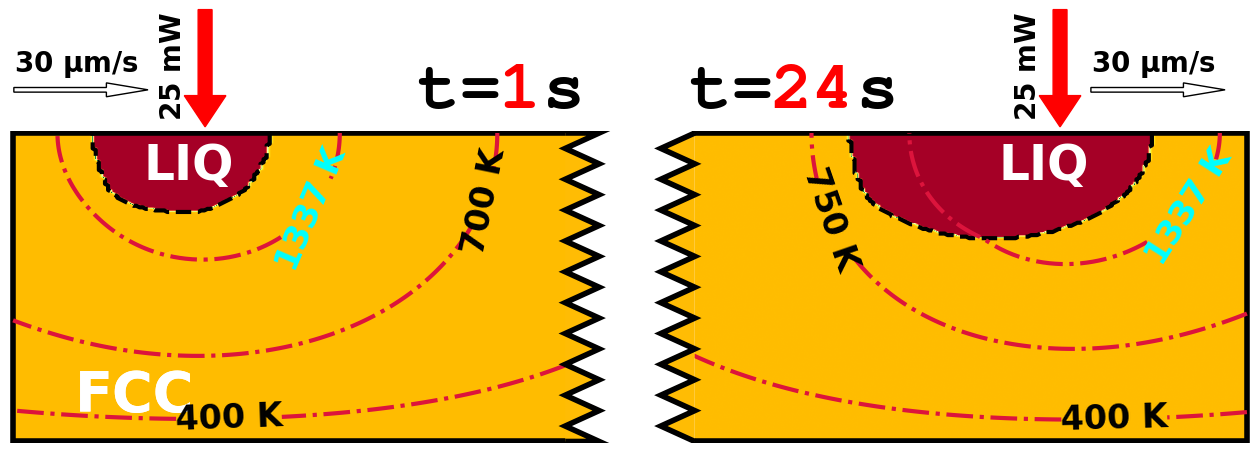

In [405]:
t_step = 33
scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"25 $\mathbf{mW}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_GT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

cmap = plt.get_cmap('RdYlGn_r')
cmap.set_under('white', alpha=0)
hmap1 = ax1.imshow(LIQ_GT[:,:180,t_step], cmap=cmap, vmin=0.5, vmax=1.0, aspect=0.5,  interpolation='quadric',)

cmap = plt.get_cmap('Wistia')
cmap.set_under('white', alpha=0) 
hmap2 = ax1.imshow(1-LIQ_GT[:,:180,t_step], cmap=cmap, vmin=0.5, vmax=1.5, aspect=0.5, interpolation='quadric',)

contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_GT[:, :, t_step], levels=contour_level_LIQ, colors='k', linestyles='--', linewidths=3,)

contour_levels = [400, 700,  1337]
label_colors = ['k', 'k', 'aqua']
contour = ax1.contour(temp_GT[:, :180, t_step], levels=contour_levels, colors='crimson', linewidths=3, linestyles='dashdot')
[(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=24, fmt='%1.0f K'), label_colors)]
  
ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
# ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
# ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
ax1.text(laser_pos-62, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
ax1.arrow(laser_pos-62, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
AuFCC_txt = ax1.text(20,180,'FCC', fontsize = 40, weight='bold', color='white')
AuLIQ_txt = ax1.text(laser_pos-20, 30,'LIQ', fontsize = 35, weight='bold', color='white')

# ax1.set_title(f't = {timeS_GT[t_step]:.0f}s', pad=10, loc='left', fontsize=30, weight='bold')
txt1 = Text(x=0.38, y=0.72, text='t= s', fontsize=50, color='k', rotation=0, weight='bold', fontname='FreeMono',)
txt2 = Text(x=0.43, y=0.72, text=f'{timeS_GT[t_step]:.0f}', fontsize=50, color='red', rotation=0, weight='bold', fontname='FreeMono',)
fig.add_artist(txt1)
fig.add_artist(txt2)

##################################
##################################
t_step = 419
laser_act_pos = 125 + timeS_GT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

LIQ_GT_ = np.copy(LIQ_GT.astype(float))
temp_GT_ = np.copy(temp_GT)
temp_GT_[:,:220,:] =  np.nan
LIQ_GT_[:,:220,:] = np.nan

cmap = plt.get_cmap('RdYlGn_r')
cmap.set_under('white', alpha=0)
hmap3 = ax1.imshow(LIQ_GT_[:,:,t_step], cmap=cmap, vmin=0.5, vmax=1.0, aspect=0.5,  interpolation='quadric',)


cmap = plt.get_cmap('Wistia')
cmap.set_under('white', alpha=0) 
hmap4 = ax1.imshow(1-LIQ_GT_[:,:,t_step], cmap=cmap, vmin=0.5, vmax=1.5, aspect=0.5, interpolation='quadric',)

contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_GT_[:, :, t_step], levels=contour_level_LIQ, colors='k', linestyles='--', linewidths=3,)

contour_levels = [400, 750,  1337]
label_colors = ['k', 'k', 'aqua']
contour = ax1.contour(temp_GT_[:, :, t_step], levels=contour_levels, colors='crimson', linewidths=3, linestyles='dashdot')
[(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=24, fmt='%1.0f K'), label_colors)]
  
ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
# ax1.text(laser_pos-65, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
# ax1.arrow(laser_pos-65, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)
AuFCC_txt = ax1.text(20,180,'FCC', fontsize = 40, weight='bold', color='white')
AuLIQ_txt = ax1.text(laser_pos-20, 30,'LIQ', fontsize = 35, weight='bold', color='white')

# ax1.set_title(f't = {timeS_GT[t_step]:.0f}s', pad=10, loc='right', fontsize=20, weight='bold')

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(0)

# x1 = 10*[179, 190]+[179]
# x2 = 10*[221, 210]+[221]
x1 = [179]+10*[190, 179]+[190]+[179]
x2 = [221]+10*[221, 210]+[221]+[221]
y = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]
p_pts1 = np.array(list(zip(x1, y)))
p_pts2 = np.array(list(zip(x2, y)))
polygon1 = Polygon(p_pts1, closed=False, fill=True, facecolor='#ffbc04', linestyle='-', edgecolor='black', linewidth=4, zorder=10,)
polygon2 = Polygon(p_pts2, closed=False, fill=True, facecolor='#ffbc04', linestyle='-', edgecolor='black', linewidth=4, zorder=10)
ax1.add_patch(polygon1)
ax1.add_patch(polygon2)

l1 = [(180,200),(0,200), (0,0), (180,0)]
l2 = [(220,0),(400,0), (400,200),(220, 200)]
polygons = [l1, l2]
for poly in polygons: ax1.add_patch(patches.Polygon(poly, closed=False, edgecolor='black', facecolor='none', linewidth=4))


txt3 = Text(x=0.55, y=0.72, text='t=  s', fontsize=50, color='k', rotation=0, weight='bold', fontname='FreeMono',)
txt4 = Text(x=0.60, y=0.72, text=f'{timeS_GT[t_step]:.0f}', fontsize=50, color='red', rotation=0, weight='bold', fontname='FreeMono',)
fig.add_artist(txt3)
fig.add_artist(txt4)

# plt.savefig('../../figures/Phase_GT.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Phase_GT.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Phase_GT.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Phase_GT.jpg',bbox_inches='tight',)

plt.show()

## Temperature

### Fitting

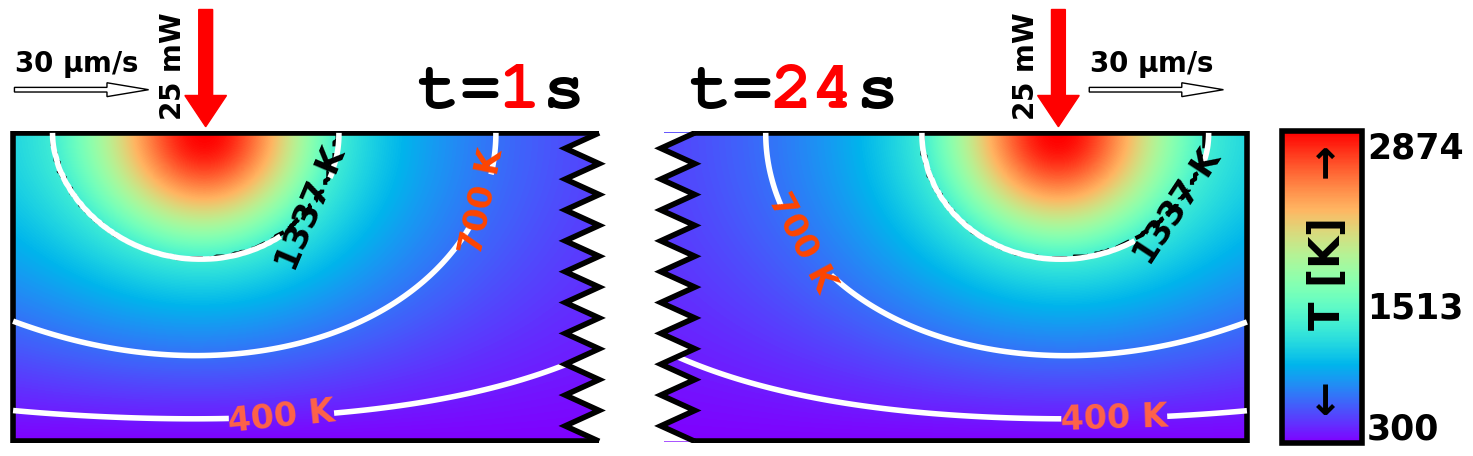

In [467]:
t_step = 82
scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"25 $\mathbf{mW}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_GF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

T_max = temp_GF[:,:,t_step].max()

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(temp_GF[:,:190,t_step], cmap='rainbow', vmin=300, vmax=T_max, aspect=0.5,  interpolation='quadric')
contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_GF[:, :, t_step], levels=contour_level_LIQ, colors='k', linestyles='--', linewidths=3,)

contour_levels = [400, 700,  1337]
label_colors = ['tomato', 'orangered', 'k']
contour = plt.contour(temp_GF[:, :190, t_step], levels=contour_levels, colors='white', linewidths=4,)
[(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=24, fmt='%1.0f K'), label_colors)]

ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
ax1.text(laser_pos-62, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
ax1.arrow(laser_pos-62, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)

txt1 = Text(x=0.38, y=0.72, text='t= s', fontsize=50, color='k', rotation=0, weight='bold', fontname='FreeMono',)
txt2 = Text(x=0.43, y=0.72, text=f'{timeS_GF[t_step]:.0f}', fontsize=50, color='red', rotation=0, weight='bold', fontname='FreeMono',)
fig.add_artist(txt1)
fig.add_artist(txt2)

##################################
##################################

t_step = 465
laser_act_pos = 125 + timeS_GF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

LIQ_GF_ = np.copy(LIQ_GF.astype(float))
LIQ_GF_[:,:210,:] = np.nan

temp_GF_ = np.copy(temp_GF)
temp_GF_[:,:210,:] =  np.nan

hmap3 = ax1.imshow(temp_GF_[:,:,t_step], cmap='rainbow', vmin=300, vmax=T_max, aspect=0.5,  interpolation='quadric')

contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_GF_[:, :, t_step], levels=contour_level_LIQ, colors='k', linestyles='--', linewidths=3,)

contour_levels = [400, 700,  1337]
label_colors = ['tomato', 'orangered', 'k']
contour = plt.contour(temp_GF_[:, :, t_step], levels=contour_levels, colors='white', linewidths=4,)
[(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=24, fmt='%1.0f K'), label_colors)]
  
ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(0)

x1 = 10*[190, 179]+[190]
y1 = list(np.linspace(0, 200, 21, dtype=int))
x2 = [221]+10*[221, 210]+[221]+[221]
y2 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]
x3 = [210]+10*[221, 210]+[221]+[210]
y3 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]+[200]
p_pts1 = np.array(list(zip(x1, y1)))
p_pts2 = np.array(list(zip(x2, y2)))
p_pts3 = np.array(list(zip(x3, y3)))
polygon1 = Polygon(p_pts1, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='black', linewidth=4, zorder=10,)
polygon2 = Polygon(p_pts2, closed=False, fill=True, facecolor='none', linestyle='-', edgecolor='black', linewidth=4, zorder=10)
polygon3 = Polygon(p_pts3, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='none', linewidth=4, zorder=10)
ax1.add_patch(polygon1)
ax1.add_patch(polygon3)
ax1.add_patch(polygon2)

l1 = [(190,200),(0,200), (0,0), (190,0)]
l2 = [(220,0),(400,0), (400,200),(220, 200)]
polygons = [l1, l2]
for poly in polygons: ax1.add_patch(patches.Polygon(poly, closed=False, edgecolor='black', facecolor='none', linewidth=4))


txt3 = Text(x=0.55, y=0.72, text='t=  s', fontsize=50, color='k', rotation=0, weight='bold', fontname='FreeMono',)
txt4 = Text(x=0.60, y=0.72, text=f'{timeS_GF[t_step]:.0f}', fontsize=50, color='red', rotation=0, weight='bold', fontname='FreeMono',)
fig.add_artist(txt3)
fig.add_artist(txt4)


############## Color Bar ###########
ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
# cbar.set_label(r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', color='k',  labelpad=-115, fontsize=30, rotation=90, weight='bold')
text = Text(x=0.935, y=0.335, text=r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', fontsize=30, color='k', rotation=90, weight='bold')
fig.add_artist(text)
cbar.set_ticks([np.max(temp_GF[:,:,t_step])*0.15, (np.max(temp_GF[:,:,t_step]))/2, np.max(temp_GF[:,:,t_step])*0.96], labels=[f'{np.min(temp_GF[:,:,t_step]):.0f}', f'{np.max(temp_GF[:,:,t_step])/2 :.0f}', f'{np.max(temp_GF[:,:,t_step])*0.95:.0f}'], weight='bold') 

ax2.spines[:].set_linewidth(4)

# plt.savefig('../../figures/Temperature_GF.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Temperature_GF.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Temperature_GF.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Temperature_GF.jpg',bbox_inches='tight',)

plt.show()

### TDB

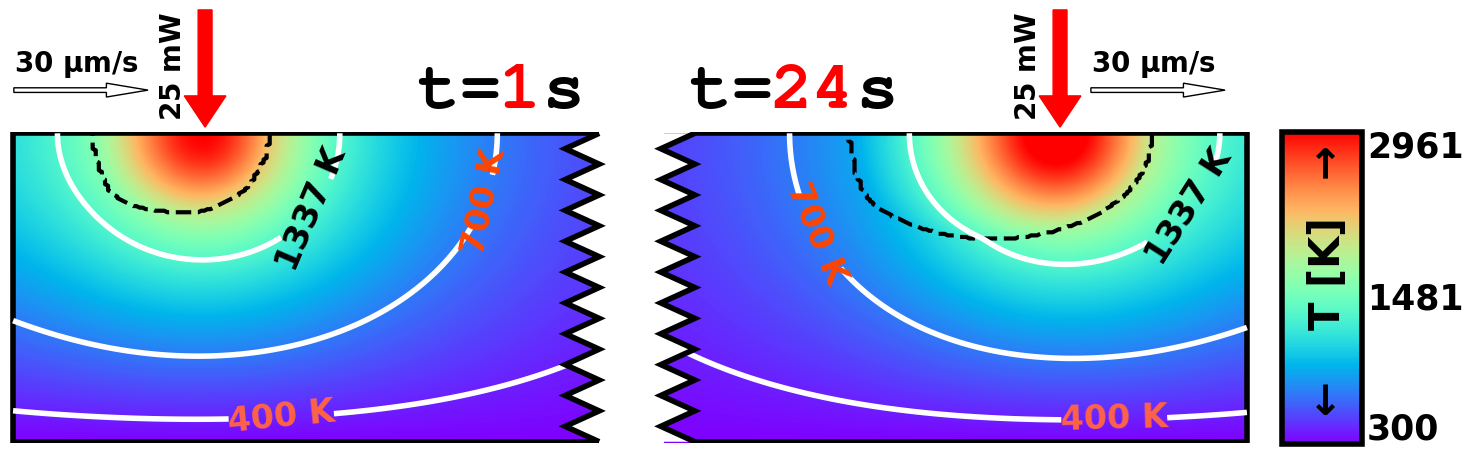

In [489]:
t_step = 33
scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"25 $\mathbf{mW}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_GT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

T_max = temp_GT[:,:,t_step].max()

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(temp_GT[:,:190,t_step], cmap='rainbow', vmin=300, vmax=T_max, aspect=0.5,  interpolation='quadric')
contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_GT[:, :, t_step], levels=contour_level_LIQ, colors='k', linestyles='--', linewidths=3,)

contour_levels = [400, 700,  1337]
label_colors = ['tomato', 'orangered', 'k']
contour = plt.contour(temp_GT[:, :190, t_step], levels=contour_levels, colors='white', linewidths=4,)
[(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=24, fmt='%1.0f K'), label_colors)]

ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
ax1.text(laser_pos-62, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
ax1.arrow(laser_pos-62, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)

txt1 = Text(x=0.38, y=0.72, text='t= s', fontsize=50, color='k', rotation=0, weight='bold', fontname='FreeMono',)
txt2 = Text(x=0.43, y=0.72, text=f'{timeS_GT[t_step]:.0f}', fontsize=50, color='red', rotation=0, weight='bold', fontname='FreeMono',)
fig.add_artist(txt1)
fig.add_artist(txt2)

##################################
##################################

t_step = 419
laser_act_pos = 125 + timeS_GT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

LIQ_GT_ = np.copy(LIQ_GT.astype(float))
LIQ_GT_[:,:210,:] = np.nan

temp_GT_ = np.copy(temp_GT)
temp_GT_[:,:210,:] =  np.nan

hmap2 = ax1.imshow(temp_GT_[:,:,t_step], cmap='rainbow', vmin=300, vmax=T_max, aspect=0.5,  interpolation='quadric')

contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_GT_[:, :, t_step], levels=contour_level_LIQ, colors='k', linestyles='--', linewidths=3,)

contour_levels = [400, 700,  1337]
label_colors = ['tomato', 'orangered', 'k']
contour = plt.contour(temp_GT_[:, :, t_step], levels=contour_levels, colors='white', linewidths=4,)
[(label.set_fontweight('bold'), label.set_color(color)) for label, color in zip(plt.clabel(contour, inline=True, fontsize=24, fmt='%1.0f K'), label_colors)]
  
ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(0)

x1 = 10*[190, 179]+[190]
y1 = list(np.linspace(0, 200, 21, dtype=int))
x2 = [221]+10*[221, 210]+[221]+[221]
y2 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]
x3 = [210]+10*[221, 210]+[221]+[210]
y3 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]+[200]
p_pts1 = np.array(list(zip(x1, y1)))
p_pts2 = np.array(list(zip(x2, y2)))
p_pts3 = np.array(list(zip(x3, y3)))
polygon1 = Polygon(p_pts1, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='black', linewidth=4, zorder=10,)
polygon2 = Polygon(p_pts2, closed=False, fill=True, facecolor='none', linestyle='-', edgecolor='black', linewidth=4, zorder=10)
polygon3 = Polygon(p_pts3, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='none', linewidth=4, zorder=10)
ax1.add_patch(polygon1)
ax1.add_patch(polygon3)
ax1.add_patch(polygon2)

l1 = [(190,200),(0,200), (0,0), (190,0)]
l2 = [(220,0),(400,0), (400,200),(220, 200)]
polygons = [l1, l2]
for poly in polygons: ax1.add_patch(patches.Polygon(poly, closed=False, edgecolor='black', facecolor='none', linewidth=4))


txt3 = Text(x=0.55, y=0.72, text='t=  s', fontsize=50, color='k', rotation=0, weight='bold', fontname='FreeMono',)
txt4 = Text(x=0.60, y=0.72, text=f'{timeS_GT[t_step]:.0f}', fontsize=50, color='red', rotation=0, weight='bold', fontname='FreeMono',)
fig.add_artist(txt3)
fig.add_artist(txt4)


############## Color Bar ###########
ax2 = fig.add_axes([0.92, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
# cbar.set_label(r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', color='k',  labelpad=-115, fontsize=30, rotation=90, weight='bold')
text = Text(x=0.935, y=0.335, text=r'$\mathbf{\leftarrow}$   T [K]  $\mathbf{\rightarrow}$', fontsize=30, color='k', rotation=90, weight='bold')
fig.add_artist(text)
cbar.set_ticks([np.max(temp_GT[:,:,t_step])*0.15, (np.max(temp_GT[:,:,t_step]))/2, np.max(temp_GT[:,:,t_step])*0.91], labels=[f'{np.min(temp_GT[:,:,t_step]):.0f}', f'{np.max(temp_GT[:,:,t_step])/2 :.0f}', f'{np.max(temp_GT[:,:,t_step])*1.0:.0f}'], weight='bold') 

ax2.spines[:].set_linewidth(4)

# plt.savefig('../../figures/Temperature_GT.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Temperature_GT.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Temperature_GT.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Temperature_GT.jpg',bbox_inches='tight',)

plt.show()

## Velocity

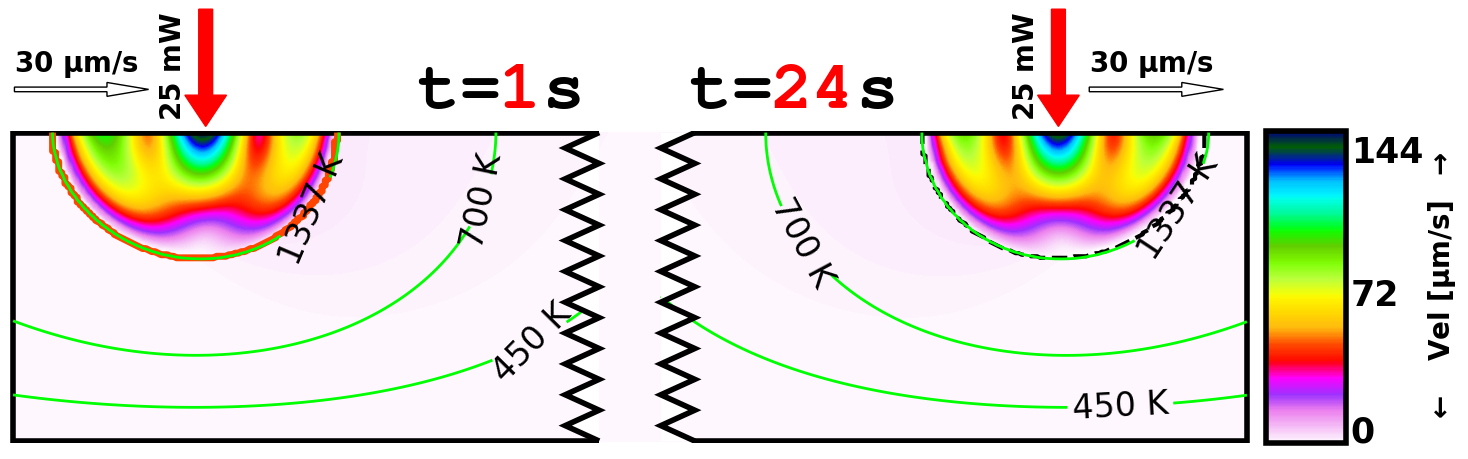

In [547]:
t_step = 82
scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"25 $\mathbf{mW}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_GF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

v_max = vel_GF[:,:,t_step].max()

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(vel_GF[:,:,t_step], cmap='gist_ncar_r', vmin=2, vmax=v_max, aspect=0.5,  interpolation='bilinear')
contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_GF[:, :, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=5,)

contour_levels = [450, 700, 1337]
contour = ax1.contour(temp_GF[:, :190, t_step], levels=contour_levels, colors='lime', linewidths=2,)
clabels = ax1.clabel(contour, inline=True, fontsize=24, colors='k', fmt='%1.0f K')

ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
ax1.text(laser_pos-62, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
ax1.arrow(laser_pos-62, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)

txt1 = Text(x=0.38, y=0.72, text='t= s', fontsize=50, color='k', rotation=0, weight='bold', fontname='FreeMono',)
txt2 = Text(x=0.43, y=0.72, text=f'{timeS_GF[t_step]:.0f}', fontsize=50, color='red', rotation=0, weight='bold', fontname='FreeMono',)
fig.add_artist(txt1)
fig.add_artist(txt2)

##################################
##################################

t_step = 465
laser_act_pos = 125 + timeS_GF[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

LIQ_GF_ = np.copy(LIQ_GF.astype(float))
LIQ_GF_[:,:210,:] = np.nan

temp_GF_ = np.copy(temp_GF)
temp_GF_[:,:210,:] =  np.nan

vel_GF_ = np.copy(vel_GF)
vel_GF_[:,:210,:] =  np.nan

hmap2 = ax1.imshow(vel_GF_[:,:,t_step], cmap='gist_ncar_r', vmin=2, vmax=v_max, aspect=0.5,  interpolation='bilinear')

contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_GF_[:, :, t_step], levels=contour_level_LIQ, colors='k', linestyles='--', linewidths=3,)

contour_levels = [450, 700, 1337]
contour = ax1.contour(temp_GF_[:, :, t_step], levels=contour_levels, colors='lime', linewidths=2,)
clabels = ax1.clabel(contour, inline=True, fontsize=24, colors='k', fmt='%1.0f K')
  
ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(0)

x1 = 10*[190, 179]+[190]
y1 = list(np.linspace(0, 200, 21, dtype=int))
x2 = [221]+10*[221, 210]+[221]+[221]
y2 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]
x3 = [210]+10*[221, 210]+[221]+[210]
y3 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]+[200]
p_pts1 = np.array(list(zip(x1, y1)))
p_pts2 = np.array(list(zip(x2, y2)))
p_pts3 = np.array(list(zip(x3, y3)))
polygon1 = Polygon(p_pts1, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='black', linewidth=4, zorder=10,)
polygon2 = Polygon(p_pts2, closed=False, fill=True, facecolor='none', linestyle='-', edgecolor='black', linewidth=4, zorder=10)
polygon3 = Polygon(p_pts3, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='none', linewidth=4, zorder=10)
ax1.add_patch(polygon1)
ax1.add_patch(polygon3)
ax1.add_patch(polygon2)

l1 = [(190,200),(0,200), (0,0), (190,0)]
l2 = [(220,0),(400,0), (400,200),(220, 200)]
polygons = [l1, l2]
for poly in polygons: ax1.add_patch(patches.Polygon(poly, closed=False, edgecolor='black', facecolor='none', linewidth=4))


txt3 = Text(x=0.55, y=0.72, text='t=  s', fontsize=50, color='k', rotation=0, weight='bold', fontname='FreeMono',)
txt4 = Text(x=0.60, y=0.72, text=f'{timeS_GF[t_step]:.0f}', fontsize=50, color='red', rotation=0, weight='bold', fontname='FreeMono',)
fig.add_artist(txt3)
fig.add_artist(txt4)


############## Color Bar ###########
ax2 = fig.add_axes([0.91, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
text = Text(x=1.01, y=0.335, text=r'$\mathbf{\leftarrow}$   Vel $\mathbf{[\mu m/s]}$  $\mathbf{\rightarrow}$', fontsize=20, color='k', rotation=90, weight='bold')
fig.add_artist(text)
cbar.set_ticks([np.max(vel_GF[:,:,t_step])*0.06, (np.max(vel_GF[:,:,t_step]))/2, np.max(vel_GF[:,:,t_step])*0.96], labels=[f'{np.min(vel_GF[:,:,t_step]):.0f}', f'{np.max(vel_GF[:,:,t_step])/2 :.0f}', f'{np.max(vel_GF[:,:,t_step]):.0f}'], weight='bold') 
ax2.spines[:].set_linewidth(4)

# plt.savefig('../../figures/Velocity_GF.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Velocity_GF.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Velocity_GF.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Velocity_GF.jpg',bbox_inches='tight',)

plt.show()

### TDB

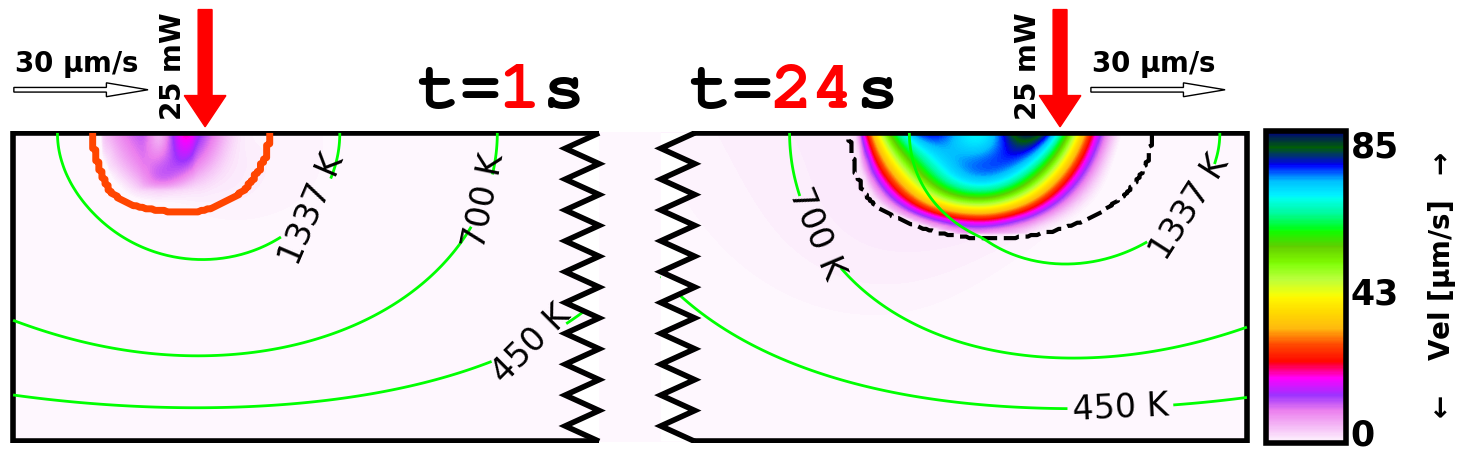

In [549]:
t_step = 33
scan_speed = r'30 $\mathbf{\mu m/s}$'
power = r"25 $\mathbf{mW}$"

laser_speed = 30
scaling_factor = 401/1000 # scaling factor for plotting figure
laser_act_pos = 125 + timeS_GT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

v_max = vel_GT[:,:,419].max()

fig, ax1 = plt.subplots(1,1, figsize=(16,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

hmap1 = ax1.imshow(vel_GT[:,:,t_step], cmap='gist_ncar_r', vmin=2, vmax=v_max, aspect=0.5,  interpolation='bilinear')
contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_GT[:, :, t_step], levels=contour_level_LIQ, colors='orangered', linestyles='-', linewidths=5,)

contour_levels = [450, 700, 1337]
contour = ax1.contour(temp_GT[:, :190, t_step], levels=contour_levels, colors='lime', linewidths=2,)
clabels = ax1.clabel(contour, inline=True, fontsize=24, colors='k', fmt='%1.0f K')

ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
ax1.text(laser_pos-62, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
ax1.arrow(laser_pos-62, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)

txt1 = Text(x=0.38, y=0.72, text='t= s', fontsize=50, color='k', rotation=0, weight='bold', fontname='FreeMono',)
txt2 = Text(x=0.43, y=0.72, text=f'{timeS_GT[t_step]:.0f}', fontsize=50, color='red', rotation=0, weight='bold', fontname='FreeMono',)
fig.add_artist(txt1)
fig.add_artist(txt2)

##################################
##################################

t_step = 419
laser_act_pos = 125 + timeS_GT[t_step]*laser_speed  # Laser actual position in true dimension
laser_pos = laser_act_pos*scaling_factor # Laser position in accordance with figure

LIQ_GT_ = np.copy(LIQ_GT.astype(float))
LIQ_GT_[:,:210,:] = np.nan

temp_GT_ = np.copy(temp_GT)
temp_GT_[:,:210,:] =  np.nan

vel_GT_ = np.copy(vel_GT)
vel_GT_[:,:210,:] =  np.nan

hmap2 = ax1.imshow(vel_GT_[:,:,t_step], cmap='gist_ncar_r', vmin=2, vmax=v_max, aspect=0.5,  interpolation='bilinear')

contour_level_LIQ = [0.8]
contour_LIQ = ax1.contour(LIQ_GT_[:, :, t_step], levels=contour_level_LIQ, colors='k', linestyles='--', linewidths=3,)

contour_levels = [450, 700, 1337]
contour = ax1.contour(temp_GT_[:, :, t_step], levels=contour_levels, colors='lime', linewidths=2,)
clabels = ax1.clabel(contour, inline=True, fontsize=24, colors='k', fmt='%1.0f K')
  
ax1.arrow(laser_pos, -80, 0, 76,  width = 4.5, color='red', length_includes_head=True, clip_on=False)
ax1.text(laser_pos-15,-12, power, rotation=90, color='k', fontsize=20, weight='bold')
ax1.text(laser_pos+10, -40, s=f'{scan_speed}', fontsize=20, weight = 'bold')
ax1.arrow(laser_pos+10, -28, 30, 0,  width = 3, color='k', fill=False, clip_on=False)

ax1.set_ylim(201, -1)    
ax1.set_xlim(-1,401)

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.spines[:].set_linewidth(0)

x1 = 10*[190, 179]+[190]
y1 = list(np.linspace(0, 200, 21, dtype=int))
x2 = [221]+10*[221, 210]+[221]+[221]
y2 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]
x3 = [210]+10*[221, 210]+[221]+[210]
y3 = [0]+list(np.linspace(0, 200, 21, dtype=int))+[200]+[200]
p_pts1 = np.array(list(zip(x1, y1)))
p_pts2 = np.array(list(zip(x2, y2)))
p_pts3 = np.array(list(zip(x3, y3)))
polygon1 = Polygon(p_pts1, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='black', linewidth=4, zorder=10,)
polygon2 = Polygon(p_pts2, closed=False, fill=True, facecolor='none', linestyle='-', edgecolor='black', linewidth=4, zorder=10)
polygon3 = Polygon(p_pts3, closed=False, fill=True, facecolor='white', linestyle='-', edgecolor='none', linewidth=4, zorder=10)
ax1.add_patch(polygon1)
ax1.add_patch(polygon3)
ax1.add_patch(polygon2)

l1 = [(190,200),(0,200), (0,0), (190,0)]
l2 = [(220,0),(400,0), (400,200),(220, 200)]
polygons = [l1, l2]
for poly in polygons: ax1.add_patch(patches.Polygon(poly, closed=False, edgecolor='black', facecolor='none', linewidth=4))


txt3 = Text(x=0.55, y=0.72, text='t=  s', fontsize=50, color='k', rotation=0, weight='bold', fontname='FreeMono',)
txt4 = Text(x=0.60, y=0.72, text=f'{timeS_GT[t_step]:.0f}', fontsize=50, color='red', rotation=0, weight='bold', fontname='FreeMono',)
fig.add_artist(txt3)
fig.add_artist(txt4)


############## Color Bar ###########
ax2 = fig.add_axes([0.91, 0.3, 0.05, 0.39]) 
ax2.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap2, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
text = Text(x=1.01, y=0.335, text=r'$\mathbf{\leftarrow}$   Vel $\mathbf{[\mu m/s]}$  $\mathbf{\rightarrow}$', fontsize=20, color='k', rotation=90, weight='bold')
fig.add_artist(text)
cbar.set_ticks([np.max(vel_GT[:,:,t_step])*0.06, (np.max(vel_GT[:,:,t_step]))/2, np.max(vel_GT[:,:,t_step])*0.96], labels=[f'{np.min(vel_GT[:,:,t_step]):.0f}', f'{np.max(vel_GT[:,:,t_step])/2 :.0f}', f'{np.max(vel_GT[:,:,t_step]):.0f}'], weight='bold') 
ax2.spines[:].set_linewidth(4)

# plt.savefig('../../figures/Velocity_GT.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Velocity_GT.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Velocity_GT.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Velocity_GT.jpg',bbox_inches='tight',)

plt.show()